<a href="https://colab.research.google.com/github/NirjharDebnath/Machine-Learning/blob/main/Classical_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classical Machine Learning Models

In [14]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd



## List of classical machine learning models

### **Regression Models**
1. **Linear Regression**
2. **Logistic Regression**
3. **Ridge Regression**
4. **Lasso Regression**
5. **Elastic Net Regression**
6. **Random Forest Regression**
7. **Support Vector Machines Regression**

### **Classification Models**
6. **k-Nearest Neighbors (k-NN)**
7. **Support Vector Machines (SVM)**
8. **Naïve Bayes**
9. **Decision Trees**
10. **Random Forest**
11. **Gradient Boosting Machines (GBM)**  
   - Includes models like XGBoost, LightGBM, and CatBoost.

### **Clustering Models**
12. **k-Means Clustering**
13. **Hierarchical Clustering**
14. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
15. **Gaussian Mixture Models (GMM)**

### **Dimensionality Reduction**
16. **Principal Component Analysis (PCA)**
17. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**
18. **Linear Discriminant Analysis (LDA)**
19. **Factor Analysis**
20. **Independent Component Analysis (ICA)**

### **Ensemble Methods**
21. **Bagging (e.g., Bagged Trees)**
22. **Boosting (e.g., AdaBoost, Gradient Boosting)**
23. **Stacking**

### **Anomaly Detection**
24. **Isolation Forest**
25. **One-Class SVM**

### **Recommendation Systems**
26. **Collaborative Filtering**
27. **Matrix Factorization**

### **Other Classical Algorithms**
28. **Perceptron**
29. **Gaussian Processes**
30. **Markov Models (e.g., Hidden Markov Model)**

 😊

## Regression


#### Data

In [15]:
DATASETS = {}

In [16]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)
data = dataset.frame
x, y = data["Latitude"], data["Longitude"]

In [17]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


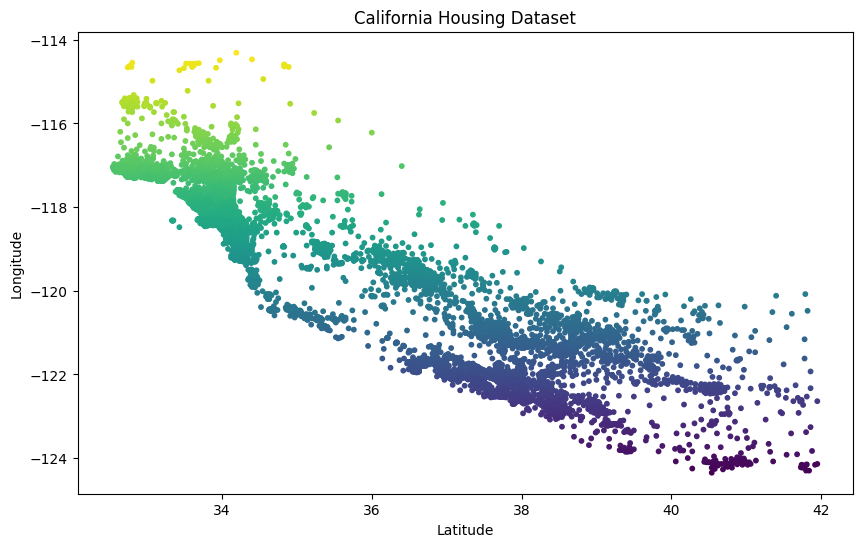

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, s=10, cmap=plt.cm.viridis)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('California Housing Dataset')
plt.show()

In [19]:
data.isnull().sum() # no missing data

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [20]:
CLASS_NAMES_Cal = data.columns
Y_Cal = data['MedHouseVal']
X_Cal = data.drop(columns = 'MedHouseVal')
X_Cal = X_Cal.to_numpy()
Y_Cal = Y_Cal.to_numpy()
missing_data = False

DATASETS["CALIFORNIA_HOUSING"] = [X_Cal, Y_Cal, CLASS_NAMES_Cal, missing_data]

In [21]:
X_Cal.shape, Y_Cal.shape

((20640, 8), (20640,))

In [22]:
from sklearn.datasets import fetch_openml

dataset_MPG = fetch_openml(name='autoMpg', version=1, as_frame=True)
data_MPG = dataset_MPG.frame
CLASS_NAMES_MPG = data_MPG.columns
Y_mpg = data_MPG['class']
X_mpg = data_MPG.drop(columns='class')
X_mpg = X_mpg.to_numpy()
Y_mpg = Y_mpg.to_numpy()
DATASETS["MPG"] = [X_mpg, Y_mpg, CLASS_NAMES_MPG]
data_MPG

,cylinders,displacement,horsepower,weight,acceleration,model,origin,class
0,8,307.0,130.0,3504,12.0,70,1,18.0
1,8,350.0,165.0,3693,11.5,70,1,15.0
2,8,318.0,150.0,3436,11.0,70,1,18.0
3,8,304.0,150.0,3433,12.0,70,1,16.0
4,8,302.0,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,27.0
394,4,97.0,52.0,2130,24.6,82,2,44.0
395,4,135.0,84.0,2295,11.6,82,1,32.0
396,4,120.0,79.0,2625,18.6,82,1,28.0


In [23]:
data_MPG.isnull().sum()
missing_data_MPG = True
DATASETS["MPG"].append(missing_data_MPG)

**Dataset Pipeline**

In [24]:
for DATASET_NAME, DATASET_VALUES in DATASETS.items():
    print(DATASET_NAME)
    print(DATASET_VALUES[0].shape)
    print(DATASET_VALUES[1].shape)
    print(DATASET_VALUES[2])
    print(DATASET_VALUES[3])
    print()

CALIFORNIA_HOUSING
(20640, 8)
(20640,)
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
False

MPG
(398, 7)
(398,)
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model', 'origin', 'class'],
      dtype='object')
True



## Choose Dataset

In [25]:
DATASET_NAME = "MPG"
X = DATASETS[DATASET_NAME][0]
Y = DATASETS[DATASET_NAME][1]
class_name = DATASETS[DATASET_NAME][2]
X.shape, Y.shape

((398, 7), (398,))

In [33]:
# Space for treating missing values

from sklearn.impute import SimpleImputer

def HandleMissingValues(X):
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    return X
if DATASETS[DATASET_NAME][3]==True:
    X = HandleMissingValues(X)

#### Model

Linear Regression

In [34]:
model = []
mse = []
rmse = []
r2 = []

In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

Model = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[32.86345735 29.58130242 21.35126058 16.80568721 12.50136229 27.2147352
 27.91706204  9.80597699 16.8835806  21.90677435 12.82048165 36.1456343
 25.2019794  13.69659447 23.97913163  6.37500508 29.55756086 23.5958146
 16.34167304 36.29467019 23.70665699 18.97681255 28.73644275 28.76794308
 14.97294014 34.6943012  25.49550117 24.95277838 21.95427152  8.76617462
 28.43608372 34.86653432 20.52354553 26.07522613 34.2452672  12.05304831
 22.95630341 21.76491284 12.32598716 26.76111869 26.26561689 27.42473085
 20.16065747  7.33443755 24.52997115 34.94517905 26.73730729 24.21492076
 22.53555783 27.5600991  22.68274634 33.65703138 32.66547111 10.9775402
 27.72572065  9.99858939 19.76803963 29.86632671 23.18389657 20.4544621
 16.21542068 32.07446683 24.02402656 20.50440401 20.92265399 25.50517507
 25.12532397 32.39195599 28.10414243 12.69119215 31.26439129 13.04126179
 10.05769097 19.41237958 27.42820665 22.12673156 20.51587758 29.57353013
 29.32239048 20.09140527]
Model : LinearRegression()
Roo

Polynomial Regression

In [36]:
# improvising polynomial regression

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2) # on testing different degrres of polinomial equation the best possible value is kept
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
Model = linear_model.LinearRegression()

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(f"{Model} with {poly}")
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {poly} with {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[32.20369131 30.58707923 19.52603105 15.16890478 13.24707187 25.42037428
 27.54953536 12.23205473 16.56580184 19.89980337 16.20262536 37.79821328
 25.48219845 14.87290792 22.40661813 14.16204089 30.41039882 22.11777695
 16.71483518 40.40801553 23.2268002  19.83789352 29.31668403 29.4954947
 15.31459066 45.77704825 25.86762417 22.99803644 19.70141412 13.79938435
 28.95634604 38.62948255 18.80675985 23.33224195 35.03615777 14.54665037
 24.27618026 18.82590555 13.17422152 26.82042455 25.63962444 27.8684555
 19.76509771  9.20099097 21.80184459 36.03598121 27.08924205 22.51448465
 23.06985032 28.27550672 20.03083981 33.10874129 33.0290642  11.74351237
 27.36008581 13.21488244 18.41182414 28.01312824 22.26748485 18.93713871
 15.6426772  31.08627323 21.98592577 19.81474823 19.8862273  23.40995635
 22.76757459 35.23380868 28.33207641 14.52150725 33.81445268 13.05965116
 13.24543945 17.16170884 27.58667603 18.3208862  18.33873576 30.2457805
 30.49763121 17.84280072]
Model : PolynomialFeatures()

Ridge Regression

In [37]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Ridge(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[32.8525204  29.58933559 21.35591876 16.80805175 12.50368942 27.2071582
 27.92345362  9.7980909  16.88873629 21.91513631 12.81899165 36.13490248
 25.2162828  13.70177116 23.98572704  6.37094413 29.5675641  23.59905467
 16.33552724 36.28393478 23.70498348 18.98529011 28.73989088 28.78156209
 14.97658356 34.69173761 25.49894397 24.95842137 21.95471864  8.75797644
 28.44197213 34.86602336 20.5180155  26.06594693 34.23522137 12.0532765
 22.97221008 21.76908635 12.32743663 26.76362407 26.27841511 27.42597666
 20.16239783  7.33822142 24.51956685 34.93248796 26.73648824 24.21695895
 22.53902815 27.56214798 22.68975062 33.64731045 32.65279466 10.97304665
 27.73753447  9.99255562 19.76406567 29.85124119 23.19335035 20.45743418
 16.21796718 32.06371812 24.03115011 20.50316479 20.93039978 25.49624446
 25.1301526  32.40281652 28.11493214 12.6932466  31.27379677 13.04524082
 10.05075801 19.41395561 27.43815708 22.1331517  20.5162251  29.58367553
 29.32496954 20.09281754]
Model : Ridge()
Root Mean s

Lasso Regression

In [38]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.Lasso(alpha=1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[31.61857362 30.18082567 22.26167734 16.8233214  12.72970341 26.58726573
 28.5143903   9.07661923 16.93351477 22.74637697 12.98983036 34.64158391
 26.94149464 14.3245902  25.1172505   6.38060194 30.48328873 23.69331218
 15.50765569 34.60312277 23.90940824 20.25627196 28.61166603 30.30290791
 15.60410629 33.61881129 26.18187773 25.84476271 21.91933253  8.18328542
 29.04509901 34.50566338 19.3322951  25.36488921 32.88258767 12.04568111
 24.71486262 21.69099505 12.39937533 27.22909216 27.38208685 27.79934765
 20.91178646  7.76246226 23.83491535 33.23401618 27.09020125 24.75671354
 23.30901333 27.96870925 23.91181159 32.47119685 31.04033135 10.58657092
 28.65045845  9.67897203 18.93732328 28.14179189 24.77920853 20.90683215
 16.39493457 30.91390633 25.1343023  20.73353611 21.89703227 24.99349063
 25.7983148  33.41395524 29.12311063 13.05420861 32.29111018 13.30106321
  9.67605745 20.02409187 27.88874342 22.27061711 20.53281682 30.26792468
 29.88014053 19.70654618]
Model : Lasso()
Root Mean

Elastic Net Regression

In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, recall_score, root_mean_squared_error

Model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model.fit(X_train, Y_train)
Y_pred = Model.predict(X_test)
print(Y_pred)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

[31.60419903 30.24784044 22.19497789 16.83023055 12.7138134  26.51952179
 28.58257528  9.04170489 16.97835065 22.71901921 12.90433691 34.6919816
 26.86765987 14.28536734 25.09471859  6.35101365 30.54514674 23.7081931
 15.51866936 34.65313347 23.86299811 20.18833714 28.66750459 30.29263784
 15.54020245 33.68351829 26.12996001 25.85523609 21.94660174  8.18151057
 29.11401138 34.55264342 19.38521441 25.29950352 32.91381163 11.98611044
 24.66068907 21.70469158 12.41494943 27.19060139 27.39812583 27.72686694
 20.86001983  7.68997237 23.7764805  33.27947616 27.05718058 24.72729378
 23.22484927 27.94823802 23.85290055 32.48975388 31.07720902 10.54356186
 28.69241971  9.63480599 18.97755577 28.18343266 24.70503981 20.90970872
 16.34181524 30.88842396 25.12180202 20.69750371 21.86493668 24.9152254
 25.82566349 33.45720829 29.11786238 13.03356874 32.34151552 13.29698969
  9.60344924 19.96337341 27.94960817 22.30193344 20.5585178  30.32915324
 29.85009907 19.75451855]
Model : ElasticNet()
Root Me

Descision Tree Regression

Model : DecisionTreeRegressor(max_depth=10, random_state=42)
Root Mean square Error = 3.4116
Mean Square Error = 11.639
R2 Score = 0.7835


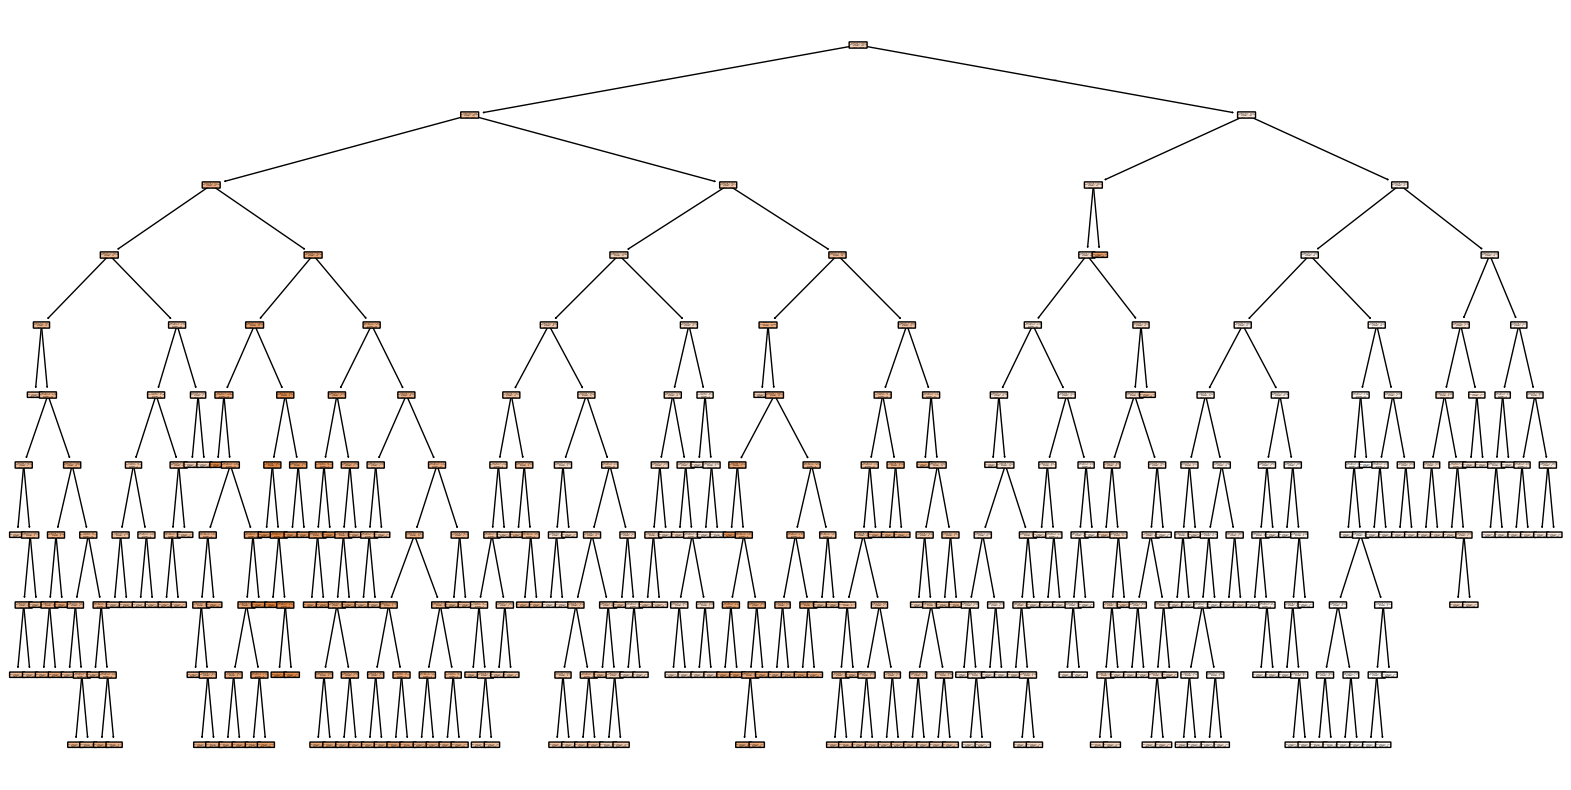

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model = DecisionTreeRegressor(max_depth=10, random_state=42)
Model.fit(X_train, Y_train)

Y_pred = Model.predict(X_test)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

plt.figure(figsize=(20, 10))
plot_tree(Model, feature_names=data.columns, filled=True, rounded=True)
plt.show()

Random Forest Regression

Model : RandomForestRegressor(max_depth=10, random_state=42)
Root Mean square Error = 2.1632
Mean Square Error = 4.6795
R2 Score = 0.913


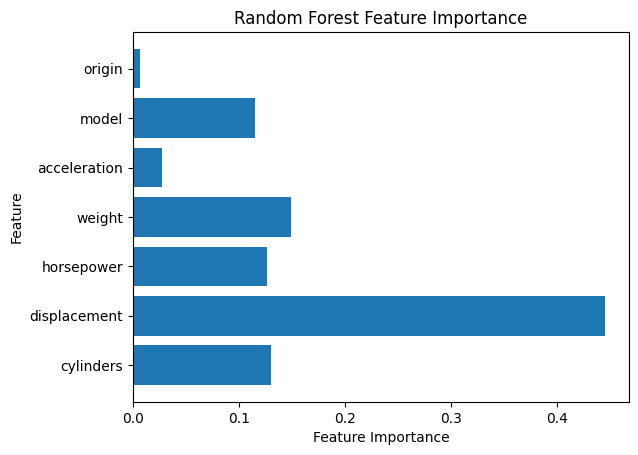

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model = RandomForestRegressor(max_depth=10, random_state=42)
Model.fit(X_train, Y_train)

Y_pred = Model.predict(X_test)

model.append(Model)
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

importances = Model.feature_importances_
feature_names = class_name[:len(class_name)-1]
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

Tensorflow Model

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6681.9438 - mae: 69.2385 - val_loss: 1120.5042 - val_mae: 29.1284
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 777.1030 - mae: 23.4485 - val_loss: 811.5349 - val_mae: 28.0710
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 481.6520 - mae: 19.3856 - val_loss: 391.2862 - val_mae: 16.6945
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 292.1892 - mae: 13.7040 - val_loss: 234.2046 - val_mae: 13.4784
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 153.7657 - mae: 10.3144 - val_loss: 124.5352 - val_mae: 8.9068
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 116.6594 - mae: 8.8560 - val_loss: 123.0206 - val_mae: 8.5990
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 97.2805 - mae: 7.8858 - val_loss: 97.3688 - val_mae: 7.7640
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 100.7310 - mae: 8.1442 - val_loss: 95.3418 - val_mae: 7.4592
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model : <Sequential name=sequential_2, built=True>
Root Mean square Error = 7.6853
Mean Square Error = 59.0631
R2 Score = -0.0985


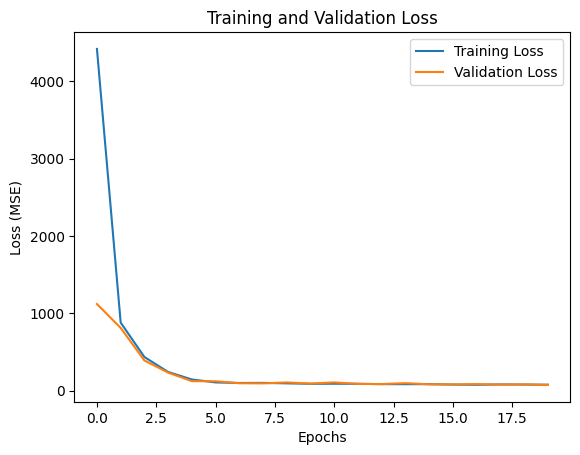

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

Model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

Model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = Model.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=32)

Y_pred = Model.predict(X_test).flatten()

model.append("Tensorflow Model")
rmse.append(round(np.sqrt(mean_squared_error(Y_test, Y_pred)), 4))
mse.append(round(mean_squared_error(Y_test, Y_pred), 4))
r2.append(round(r2_score(Y_test, Y_pred), 4))

print(f"Model : {Model}")
print(f"Root Mean square Error = {rmse[-1]}")
print(f"Mean Square Error = {mse[-1]}")
print(f"R2 Score = {r2[-1]}")

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [50]:
model = [str(m) for m in model]
ModelResultBoard = pd.DataFrame(np.array([model, mse, rmse, r2]).T, columns=['Model', 'MSE', 'RMSE', 'R2'])
print(DATASET_NAME)
ModelResultBoard.sort_values(by='R2', ascending=False)

MPG


,Model,MSE,RMSE,R2
11,"RandomForestRegressor(max_depth=10, random_sta...",4.6795,2.1632,0.913
6,"RandomForestRegressor(max_depth=5, random_stat...",5.0745,2.2527,0.9056
1,LinearRegression() with PolynomialFeatures(),6.0195,2.4535,0.888
0,LinearRegression(),8.1955,2.8628,0.8476
2,Ridge(),8.2007,2.8637,0.8475
3,Lasso(),9.112,3.0186,0.8305
4,ElasticNet(),9.1488,3.0247,0.8298
5,"DecisionTreeRegressor(max_depth=5, random_stat...",10.9128,3.3034,0.797
10,"DecisionTreeRegressor(max_depth=10, random_sta...",11.639,3.4116,0.7835
7,Tensorflow Model,33.7839,5.8124,0.3717
